# Marketing Outcome Prediction: Portuguese Bank Call Campaign

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

- clean and prepare the data, 
- build a decision tree with default hyperparameters, 
- understand all the hyperparameters that we can tune, and finally
- choose the optimal hyperparameters using grid search cross-validation.

**Dataset**

The dataset contains 45212 records with following features about the contacted persons during the campaign:
- age: age of person contacted (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self- employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced'means divorced or widowed)
- education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course', 'university.degree','unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')

- balance: account balance of customer on the day of contact (numeric)
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

- contact: contact communication type (categorical: 'cellular', 'telephone')

- day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

- month: Month of last contact (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- duration: last contact duration, in seconds (numeric)

- campaign: number of times a customer was contacted during the campaign (numeric, includes last contact)

- pdays: number of days passed after the customer was last contacted from a previous campaign (numeric; 999 means customer was not previously contacted)

- previous: number of times the customer was contacted prior to (or before) this campaign (numeric)

- poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

- y: has the customer subscribed a term deposit? (binary: 'yes', 'no')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
bank=pd.read_csv('bank/bank-full.csv', sep=';')

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.shape

(45211, 17)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank.columns[bank.dtypes=='object']

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

## Data Preparation

In [9]:
from sklearn import preprocessing

# encode categorical variables using Label Encoder

# select all categorical variables
bank_categorical = bank.select_dtypes(include=['object'])
bank_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [10]:
# apply Label encoder to df_categorical

le=preprocessing.LabelEncoder()
bank_categorical=bank_categorical.apply(le.fit_transform)
bank_categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


In [11]:
# concat df_categorical with original df
bank = bank.drop(bank_categorical.columns, axis=1)
bank = pd.concat([bank, bank_categorical], axis=1)
bank.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [12]:
# look at column types
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
balance      45211 non-null int64
day          45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
job          45211 non-null int64
marital      45211 non-null int64
education    45211 non-null int64
default      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
contact      45211 non-null int64
month        45211 non-null int64
poutcome     45211 non-null int64
y            45211 non-null int64
dtypes: int64(17)
memory usage: 5.9 MB


In [13]:
# convert target variable income to categorical
bank['y']=bank['y'].astype('category')

## Model Building and Evaluation

#### Splitting into test and train datasets

In [14]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [15]:
# Putting feature variable to X
X = bank.drop('y',axis=1)

# Putting response variable to y
y = bank['y']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Building the model with default parameters

In [16]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc=RandomForestClassifier()

In [17]:
#fitting the model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
# Making predictions using the default model
y_pred=rfc.predict(X_test)

In [19]:
# Importing Model Evaluation metrics from sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
# Classification report of the default model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11967
           1       0.65      0.38      0.48      1597

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.79      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [21]:
#Checking accuracy score and confusion matrix

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[11642   325]
 [  986   611]]
0.903347095252138


In [22]:
print('The default model has an accuracy score of', accuracy_score(y_test, y_pred))

The default model has an accuracy score of 0.903347095252138


## Hyperparameter Tuning

### Tuning Max Depth

In [23]:
#GridSearchCV to find optimal depth
from sklearn.model_selection import KFold, GridSearchCV

In [27]:
#Specifying number of folds for k-folds CV
n_folds= 5

#parameters to build the model on
parameters={'max_depth':range(2,20,2)}

#instantiate the model
rf=RandomForestClassifier()

rf= GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [28]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050365,0.005723,0.004318,0.000331,2,{'max_depth': 2},0.883254,0.883254,0.883394,0.883394,...,0.883338,0.000068,9,0.883359,0.883359,0.883324,0.883364,0.883324,0.883346,0.000018
1,0.065705,0.001201,0.004394,0.000059,4,{'max_depth': 4},0.894471,0.887046,0.886712,0.884816,...,0.888078,0.003316,8,0.894893,0.886835,0.886997,0.887313,0.886444,0.888497,0.003210
2,0.091363,0.001575,0.005171,0.000164,6,{'max_depth': 6},0.897788,0.896051,0.900458,0.897140,...,0.897431,0.001686,7,0.901766,0.896986,0.902678,0.904060,0.898807,0.900859,0.002592
3,0.115475,0.006056,0.006132,0.000408,8,{'max_depth': 8},0.899210,0.900790,0.899194,0.898878,...,0.899801,0.000875,3,0.910337,0.916933,0.912552,0.913895,0.915120,0.913767,0.002241
4,0.140147,0.003290,0.007139,0.000173,10,{'max_depth': 10},0.901422,0.901738,0.903302,0.903618,...,0.902297,0.000962,1,0.931034,0.931469,0.927522,0.930800,0.931906,0.930546,0.001559


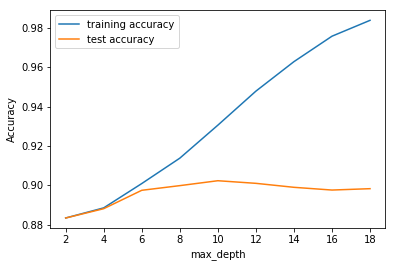

In [29]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [30]:
#parameters to build the model on
n_folds=5
parameters= {'n_estimators':range(100, 1500, 400)}

#Instantiating the model
rf=RandomForestClassifier()

rf=GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.916319,0.041764,0.078882,0.001721,100,{'n_estimators': 100},0.902054,0.901264,0.905198,0.900932,...,0.902518,0.001541,4,0.999961,0.999921,0.999961,0.999921,1.0,0.999953,0.00003
1,17.328999,4.166544,0.723762,0.170142,500,{'n_estimators': 500},0.903002,0.901264,0.906778,0.902512,...,0.903056,0.001957,3,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.00000
2,31.595519,7.379542,1.146112,0.375516,900,{'n_estimators': 900},0.903949,0.901580,0.906936,0.901880,...,0.903435,0.001937,1,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.00000
3,24.280413,0.101497,0.987719,0.002767,1300,{'n_estimators': 1300},0.903318,0.901106,0.907252,0.901722,...,0.903245,0.002151,2,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.00000


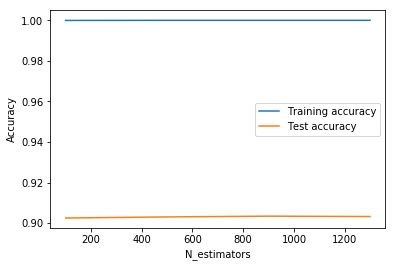

In [32]:
#Plotting accuracies with n_estimators
plt.plot(scores['param_n_estimators'],
        scores['mean_train_score'],
        label='Training accuracy')
plt.plot(scores['param_n_estimators'],
        scores['mean_test_score'],
        label='Test accuracy')
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Tuning max_features

In [24]:
#Specifying the number of folds for k-fold CV
n_folds=5

#parameters to build the model on
parameters={'max_features':range(2,17,2)}

#Instantiating the model
rf=RandomForestClassifier()

rf=GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': range(2, 17, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.134767,0.009692,0.010313,0.000248,2,{'max_features': 2},0.896051,0.896524,0.893980,0.892716,...,0.894872,0.001386,8,0.989691,0.990836,0.991429,0.991074,0.991627,0.990931,0.000678
1,0.198274,0.003606,0.009683,0.000184,4,{'max_features': 4},0.898894,0.899210,0.898088,0.897456,...,0.898063,0.000930,1,0.992100,0.992456,0.991311,0.992574,0.991982,0.992085,0.000444
2,0.278444,0.009322,0.009468,0.000135,6,{'max_features': 6},0.896524,0.898104,0.896666,0.892558,...,0.896388,0.002030,6,0.991152,0.991429,0.991745,0.993167,0.992140,0.991927,0.000702
3,0.345361,0.013249,0.009061,0.000249,8,{'max_features': 8},0.895577,0.894945,0.900458,0.896508,...,0.897273,0.002079,3,0.991389,0.991231,0.992298,0.992100,0.991942,0.991792,0.000412
4,0.412107,0.008743,0.009063,0.000327,10,{'max_features': 10},0.896367,0.897788,0.898088,0.896350,...,0.897052,0.000739,4,0.990757,0.992495,0.991350,0.992851,0.991429,0.991776,0.000776


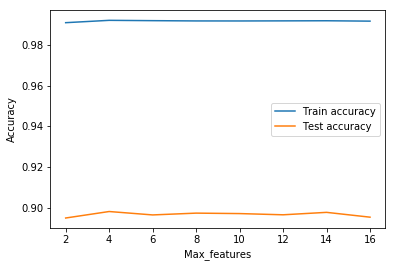

In [26]:
#Plotting accuracies with max_features
plt.plot(scores['param_max_features'],
        scores['mean_train_score'],
        label='Train accuracy')
plt.plot(scores['param_max_features'],
        scores['mean_test_score'],
        label='Test accuracy')
plt.xlabel('Max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [33]:
#Specifying the number of k_folds for grid search cross-validation
n_folds=5

#parameters to build the model on
parameters={'min_samples_leaf':range(50,500,50)}

#Instantiating the model
rf=RandomForestClassifier()

rf=GridSearchCV(rf,parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(50, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.143359,0.011277,0.007366,0.000261,50,{'min_samples_leaf': 50},0.899684,0.899368,0.900774,0.896508,...,0.898347,0.002038,1,0.902793,0.901529,0.902599,0.901809,0.904218,0.902589,0.000941
1,0.124962,0.002055,0.006732,0.000041,100,{'min_samples_leaf': 100},0.893839,0.891943,0.895402,0.893506,...,0.893924,0.001208,2,0.895722,0.894498,0.895529,0.894976,0.898057,0.895756,0.001228
2,0.121349,0.009261,0.012901,0.011733,150,{'min_samples_leaf': 150},0.894787,0.893049,0.895244,0.893664,...,0.893797,0.001102,3,0.894616,0.893589,0.895331,0.894146,0.893436,0.894224,0.000694
3,0.111579,0.007471,0.006380,0.000463,200,{'min_samples_leaf': 200},0.890205,0.888310,0.891926,0.894296,...,0.891838,0.002367,4,0.890271,0.887506,0.893001,0.894502,0.897346,0.892525,0.003395
4,0.106022,0.004069,0.006342,0.000493,250,{'min_samples_leaf': 250},0.886414,0.892101,0.885764,0.888134,...,0.888994,0.002835,5,0.885847,0.893076,0.886918,0.890355,0.892448,0.889729,0.002897


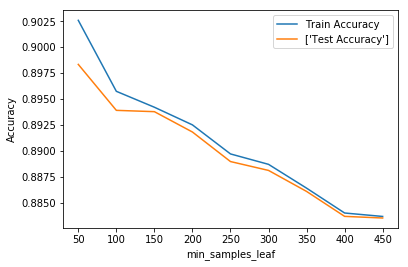

In [35]:
#Plotting the GridSrearch results
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_train_score'],
        label='Train Accuracy')
plt.plot(scores['param_min_samples_leaf'],
        scores['mean_test_score'],
        label=['Test Accuracy'])
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Tuning min_samples_split

In [36]:
#k_folds
n_folds=5

#Specifying parameters used to build the model on
parameters={'min_samples_split':range(50,600,50)}

# Instantiating the model
rf=RandomForestClassifier()

rf=GridSearchCV(rf,parameters, cv=n_folds, scoring='accuracy')

rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(50, 600, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.184677,0.008968,0.008961,0.000390,50,{'min_samples_split': 50},0.901896,0.898894,0.904882,0.901564,...,0.901444,0.002033,1,0.922503,0.923925,0.922466,0.921913,0.920412,0.922244,0.001132
1,0.163937,0.008558,0.008209,0.000577,100,{'min_samples_split': 100},0.900790,0.901896,0.901880,0.899510,...,0.901065,0.000881,2,0.909784,0.910574,0.912039,0.913145,0.913658,0.911840,0.001475
2,0.156420,0.003814,0.007760,0.000633,150,{'min_samples_split': 150},0.899842,0.900632,0.901248,0.898720,...,0.899991,0.000879,3,0.907809,0.905834,0.906193,0.907418,0.908405,0.907132,0.000972
3,0.153747,0.005110,0.007429,0.000143,200,{'min_samples_split': 200},0.900474,0.897630,0.899510,0.897298,...,0.898632,0.001191,5,0.903346,0.905597,0.902520,0.904653,0.901651,0.903553,0.001422
4,0.144819,0.002040,0.007329,0.000246,250,{'min_samples_split': 250},0.898262,0.899210,0.902512,0.897298,...,0.898569,0.002312,6,0.902832,0.903978,0.902362,0.904653,0.901769,0.903119,0.001055


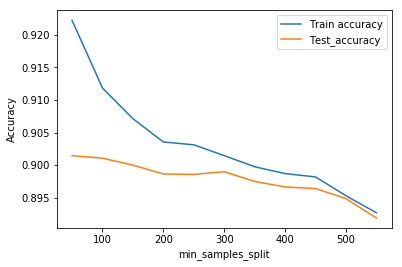

In [38]:
#Visualising Grid Search results
plt.plot(scores['param_min_samples_split'],
        scores['mean_train_score'],
        label='Train accuracy')
plt.plot(scores['param_min_samples_split'],
        scores['mean_test_score'],
        label='Test_accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [39]:
n_folds=5

parameters={'max_depth':[4,6,8],
           'n_estimators':[1200],
           'min_samples_split':[200,300],
           'min_samples_leaf':range(50,150,50),
           'max_features':[4,6,8]}

rf=RandomForestClassifier()

grid_search=GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy',
                        n_jobs = -1,verbose = 1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 11.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 6, 8], 'n_estimators': [1200], 'min_samples_split': [200, 300], 'min_samples_leaf': range(50, 150, 50), 'max_features': [4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [40]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9009068790090687 using {'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 1200}


### Fitting the final model with the best parameters obtained from grid search.

In [41]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=6,
                             n_estimators=1200)

In [42]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
# predict
predictions = rfc.predict(X_test)

In [44]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11967
           1       0.70      0.36      0.47      1597

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.81      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564



In [46]:
print(confusion_matrix(y_test,predictions))

[[11721   246]
 [ 1029   568]]


In [47]:
print(accuracy_score(y_test, predictions))

0.9060011795930404


In [48]:
predictions_train=rfc.predict(X_train)
print(accuracy_score(y_train, predictions_train))

0.9071633962144912


# Feature Importance

In [49]:
# predictors
features = X.columns

# feature_importance
importance = rfc.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999994


,variables,importance_percentage
0,duration,49.146063
1,poutcome,14.088343
2,month,7.842148
3,pdays,6.168083
4,housing,5.429997
5,age,5.399693
6,contact,2.908987
7,day,2.239589
8,previous,2.174742
9,balance,2.113669
